In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv ")

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [7]:
features = ["HomePlanet","CryoSleep","Destination", "VIP" ]
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   category
 2   CryoSleep     8476 non-null   category
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   category
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   category
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
dtypes: bool(1), category(4), float64(6), object(3)
memory usage: 654.3+ KB


In [9]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
train_df.describe(include = ['category'])

,HomePlanet,CryoSleep,Destination,VIP
count,8492,8476,8511,8490
unique,3,2,3,2
top,Earth,False,TRAPPIST-1e,False
freq,4602,5439,5915,8291


## 2. Exploratory Data Analysis (EDA)
### 2.1. Correlating categorical features
- Categorical: HomePlanet, CryoSleep, Destination, VIP
## Target Variable: `Transported`

In [11]:
train_df["CryoSleep"].value_counts(normalize = True).to_frame()

,CryoSleep
False,0.641694
True,0.358306


In [12]:
train_df["Transported"].value_counts(normalize=True).to_frame()

,Transported
True,0.503624
False,0.496376


### `HomePlanet`

In [13]:
train_df["HomePlanet"].value_counts().to_frame()

,HomePlanet
Earth,4602
Europa,2131
Mars,1759


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

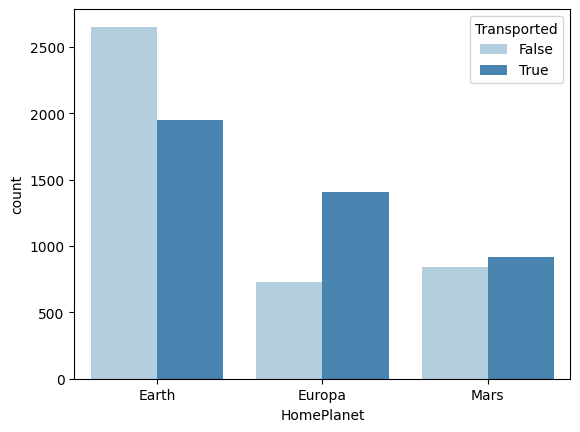

In [14]:
sns.countplot(data=train_df, x = "HomePlanet", hue="Transported", palette="Blues")

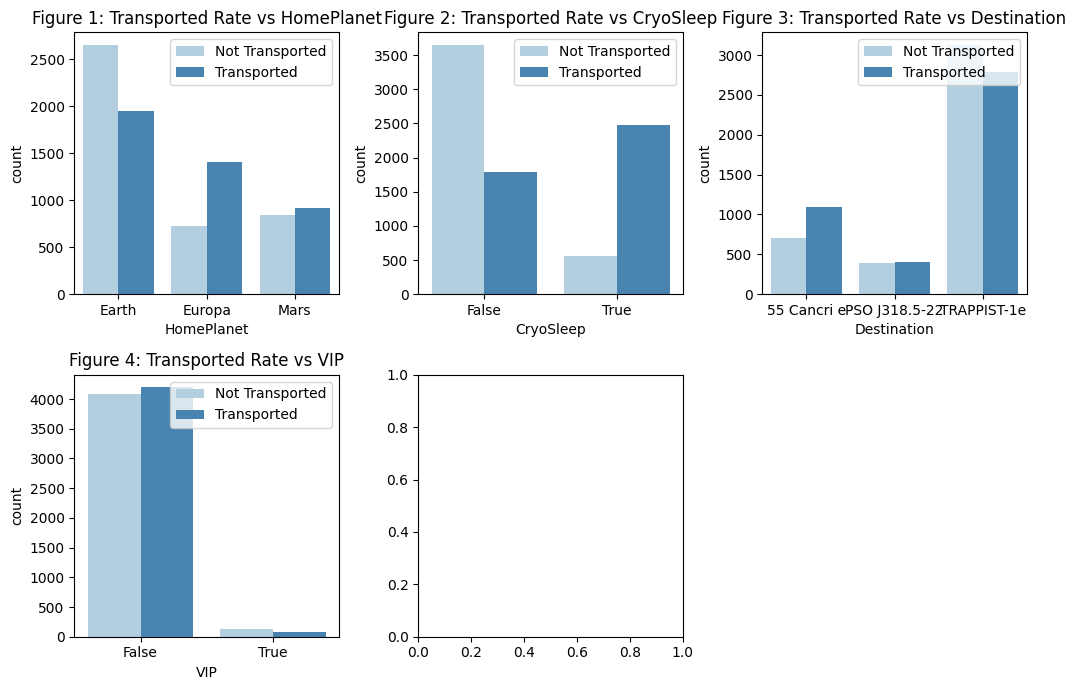

In [15]:

cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', ]

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue="Transported", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Transported Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Transported', 'Transported'])
ax.flat[-1].set_visible(False) #Remove the last subplot
plt.tight_layout()
plt.show()


Observation:
- Transported Rate:
    - Fig1: rate có HomePlanet là Europa là cao nhất, Earth là thấp nhất( chưa kết luận được có ảnh hưởng đến output k)
    - Fig2: rate có CryoSleep có Transported Rate là cao nhất
    - Fig3: 2 điểm đến có tỷ lệ TR là ngang nhau(50%), chỉ có 55 Cacnri là TR cao hơn
    - Fig4: no Vip > VIP

## 2.2. EDA for Numerical Features
- Numercial Features: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [16]:
train_df['TotalService'] = train_df["RoomService"] + train_df["FoodCourt"] + train_df["ShoppingMall"] + train_df["Spa"] + train_df["VRDeck"] 

In [17]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalService
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


<AxesSubplot:xlabel='TotalService', ylabel='Count'>

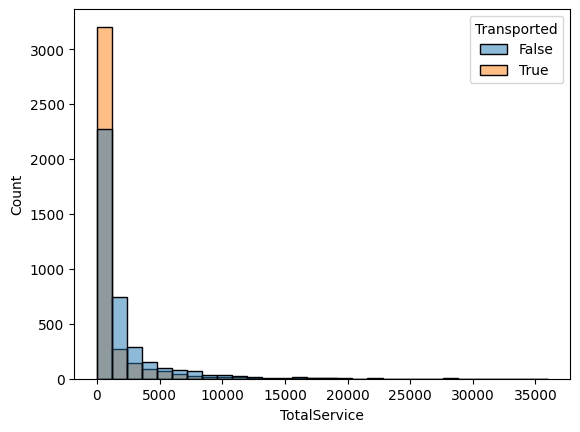

In [18]:
sns.histplot(data = train_df, x = "TotalService", hue="Transported", bins = 30, kde= False)

In [19]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalService
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,7785.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1484.601541
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2845.288241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,736.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1486.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


In [20]:
train_df.loc[(train_df.CryoSleep == True) & (train_df.VIP == True) ]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalService
365,0402_01,NaN,True,D/15/S,55 Cancri e,32.0,True,0.0,0.0,0.0,0.0,0.0,Teron Sageng,True,0.0
589,0612_01,Europa,True,B/25/P,TRAPPIST-1e,27.0,True,0.0,0.0,0.0,0.0,0.0,Achyon Ranaly,True,0.0
1849,1976_03,Europa,True,B/82/S,55 Cancri e,26.0,True,0.0,0.0,0.0,0.0,0.0,Cellah Lansuffle,True,0.0
2394,2572_02,Europa,True,C/93/S,55 Cancri e,56.0,True,0.0,0.0,0.0,0.0,0.0,Spuri Suptibler,True,0.0
2675,2866_01,Europa,True,C/110/S,TRAPPIST-1e,36.0,True,0.0,0.0,0.0,0.0,0.0,Hadirk Wheededly,True,0.0
3104,3349_01,Europa,True,C/111/P,TRAPPIST-1e,73.0,True,0.0,0.0,0.0,NaN,0.0,Sargin Brakeril,True,NaN
4071,4348_01,Europa,True,B/142/P,TRAPPIST-1e,47.0,True,0.0,0.0,0.0,0.0,0.0,Krazet Conate,True,0.0
4155,4441_01,Europa,True,B/144/P,55 Cancri e,31.0,True,0.0,0.0,0.0,0.0,0.0,Kabiton Clinarfork,True,0.0
4401,4668_02,Europa,True,C/180/S,55 Cancri e,27.0,True,0.0,0.0,0.0,0.0,0.0,Sadrus Scerodbox,True,0.0
4503,4786_01,Europa,True,B/160/P,TRAPPIST-1e,46.0,True,0.0,0.0,0.0,0.0,0.0,Enibah Dratembid,True,0.0


## `TotalService`

In [21]:
train_df["TotalService"].describe()

count     7785.000000
mean      1484.601541
std       2845.288241
min          0.000000
25%          0.000000
50%        736.000000
75%       1486.000000
max      35987.000000
Name: TotalService, dtype: float64

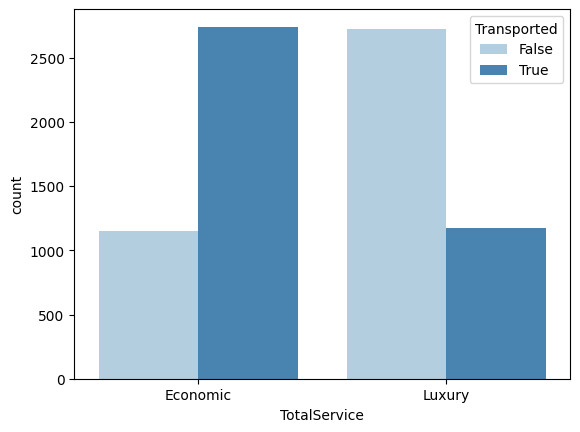

In [22]:
TotalService_categories = ['Economic', 'Luxury']
quartile_data = pd.qcut(train_df['TotalService'], 2, labels = TotalService_categories)
sns.countplot(x=quartile_data, hue=train_df['Transported'], palette='Blues');

## `age`

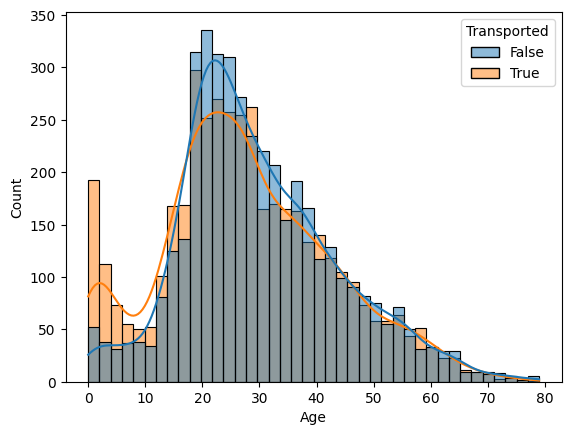

In [23]:

sns.histplot(data=train_df, x='Age', hue='Transported' ,bins = 40, kde=True);


## 4. Feature Engineering & Data Wrangling
### 4.1 Feature Engineering
#### Name
- Regular Expression

In [40]:
train_df['Cabin'].tail(10)

8683    F/1894/P
8684    G/1508/P
8685      A/97/P
8686      A/97/P
8687      A/97/P
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, dtype: string

In [37]:
train_df["Cabin"] = train_df["Cabin"].astype("string")

In [38]:
import re #regular expression

def extract_title(Cabin):
    p = re.compile(r"([PS])")
    return p.search(Cabin).groups(1)[0].strip()



In [39]:
train_df['Title'] = train_df["Cabin"].apply(lambda Cabin: extract_title(Cabin))

TypeError: expected string or bytes-like object

In [41]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalService
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


## 4.2. Data Wrangling (convert data raw to data available for TRAINING)

In [42]:

num_features = ['Age']
cat_features = ['HomePlanet', 'CryoSleep', 'Destination']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'HomePlanet', 'CryoSleep', 'Destination']


In [43]:

def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")
            
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 2.06% missing values.
HomePlanet has 2.31% missing values.
CryoSleep has 2.50% missing values.
Destination has 2.09% missing values.
Age has 2.13% missing values.
HomePlanet has 2.03% missing values.
CryoSleep has 2.17% missing values.
Destination has 2.15% missing values.


## Filling missing values
#### Age
    - Filling missing values with median of whole dataset

In [44]:
X = train_df[feature_cols]
y = train_df['Transported']

In [45]:
X_test = test_df[feature_cols]

In [46]:

# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [47]:
num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [48]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [49]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['HomePlanet', 'CryoSleep', 'Destination'])])

In [50]:
X = preprocessor.transform(X) # X -> X_train, X_val

In [51]:
X_test = preprocessor.transform(X_test)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [55]:

y_pred = regressor.predict(X_val)
y_pred

array([0.30859375, 0.3828125 , 0.74609375, ..., 0.3125    , 0.33203125,
       0.546875  ])

In [56]:
pd.DataFrame({'y':y_val, 'y_pred': y_pred})

,y,y_pred
1135,False,0.308594
8223,False,0.382812
1582,False,0.746094
3702,True,0.300781
3869,True,0.296875
...,...,...
5745,True,0.785156
6665,True,0.289062
959,False,0.312500
2391,False,0.332031


In [57]:
regressor.score(X_val, y_val)

0.240955993834009

In [58]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_val, y_val)

0.7360552041403106

In [64]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
rf.score(X_val, y_val)

0.7182288671650374

In [66]:

y_pred = rf.predict(X_val)
y_pred

array([False, False,  True, ..., False, False, False])

In [67]:
pd.DataFrame({'y':y_val, 'y_pred': y_pred})

,y,y_pred
1135,False,False
8223,False,False
1582,False,True
3702,True,False
3869,True,True
...,...,...
5745,True,True
6665,True,False
959,False,False
2391,False,False
